# Увеличение покупательской активности сервиса "В один клик" 

## Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. \
Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.\
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. \

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Подход для разработки решения следующий**

1. Промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
2. Собрать данные по клиентам по следующим группам:
    - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
    - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
    - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
    - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
3. Построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
4. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
5. Используя данные модели и данные о прибыльности клиентов, выделить сегменты покупателей и разработать для них персонализированные предложения.

Руководство одобрило описание решения, и мне, как специалисту по DS, нужно его реализовать.

**Цель проекта**

Целью исследования является сегментация покупателей и разработка персонализированных предложений для них.

## Загрузка данных.

Импорт библиотек.

In [248]:
!pip install phik -q

In [249]:
!pip install scikit-learn==1.6.1 

  Using cached scikit_learn-1.6.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [250]:
import phik

In [251]:
import sklearn

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from optuna.integration import OptunaSearchCV

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, f1_score


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.inspection import permutation_importance

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

In [253]:
!pip install shap -q

In [254]:
import shap

Объявим константы.

In [256]:
RANDOM_STATE = 42
TEST_SIZE =0.25

Загрузим данные

In [255]:
try:
    df_market_file = pd.read_csv('/datasets/market_file.csv')
    df_market_money = pd.read_csv('/datasets/market_money.csv')
    df_market_time = pd.read_csv('/datasets/market_time.csv')
    df_money = pd.read_csv('/datasets/money.csv', sep=';')
except:
    df_market_file = pd.read_csv(r"C:\Users\tzslapin\Downloads\market_file.csv")
    df_market_money = pd.read_csv(r"C:\Users\tzslapin\Downloads\market_money.csv")
    df_market_time = pd.read_csv(r"C:\Users\tzslapin\Downloads\market_time.csv")
    df_money = pd.read_csv(r"C:\Users\tzslapin\Downloads\money.csv", sep=';')

In [257]:
print(df_market_file.shape)
df_market_file.head()

(1300, 13)


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


В датафрейме присутствует следующая информация. Количество строк `id`- 1300.

- `id` — номер покупателя в корпоративной базе данных.
- `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
- `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
- `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
- `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
- `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
- `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

In [258]:
print(df_market_money.shape)
df_market_money.head()

(3900, 3)


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


Количество строк 3900, соответствует 1300 умножить на 3, то есть для каждого `id` три выручки за 3 месяца. Похоже на правду.

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- `Выручка` — сумма выручки за период.

In [259]:
print(df_market_time.shape)
df_market_time.head()

(2600, 3)


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


Количество строк 2600, соответствует 1300 умножить на 3, то есть для каждого `id` два значения.

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксировано общее время.
- `минут` — значение времени, проведённого на сайте, в минутах.

In [260]:
print(df_money.shape)
df_money.head()

(1300, 2)


,id,Прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


Видим в `df_money` некорректный разделитель дробных значений. Изменим разделитель на точку.

In [261]:
df_money['Прибыль']= df_money['Прибыль'].str.replace(',', '.')
df_money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- `id` — номер покупателя в корпоративной базе данных.
- `Прибыль` — значение прибыли.

В даныых на первый взгляд не видно отклонений.

**Вывод:**
1. Проведена загрузка данных и первичная обработка - заменены разделители дробных значений на точку в `df_money`
2. Изучены 4 датаферёма с которыми предстоит работать.

## Предобработка данных.

Приведем названия столбцов к нижнему регистру

In [262]:
df_market_file.columns = df_market_file.columns.str.lower()
df_market_money.columns = df_market_money.columns.str.lower()
df_market_time.columns = df_market_time.columns.str.lower()
df_money.columns = df_money.columns.str.lower()

In [263]:
df_market_money

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
...,...,...,...
3895,216646,препредыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,препредыдущий_месяц,5183.0


Изучим пропуски

In [264]:
df_market_file.isna().sum()

id                                     0
покупательская активность              0
тип сервиса                            0
разрешить сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

In [265]:
df_market_money.isna().sum()

id         0
период     0
выручка    0
dtype: int64

In [266]:
df_market_time.isna().sum()

id        0
период    0
минут     0
dtype: int64

In [267]:
df_money.isna().sum()

id         0
прибыль    0
dtype: int64

Далее - дубликаты

In [268]:
print(df_market_file.duplicated().sum())
print(df_market_money.duplicated().sum())
print(df_market_time.duplicated().sum())
df_money.duplicated().sum()

0
0
0


0

Изучим типы данных

In [269]:
df_market_file.dtypes

id                                       int64
покупательская активность               object
тип сервиса                             object
разрешить сообщать                      object
маркет_актив_6_мес                     float64
маркет_актив_тек_мес                     int64
длительность                             int64
акционные_покупки                      float64
популярная_категория                    object
средний_просмотр_категорий_за_визит      int64
неоплаченные_продукты_штук_квартал       int64
ошибка_сервиса                           int64
страниц_за_визит                         int64
dtype: object

Здесь все хорошо

In [270]:
print(df_market_money.dtypes)
print(df_market_time.dtypes)
df_money.dtypes

id           int64
период      object
выручка    float64
dtype: object
id         int64
период    object
минут      int64
dtype: object


id          int64
прибыль    object
dtype: object

Прибыль имеет тип `object`. Приведем в соответствие.

In [271]:
df_money['прибыль'] = df_money['прибыль'].astype('float')

In [272]:
df_money.dtypes

id           int64
прибыль    float64
dtype: object

Перейдем к проверке неявных дубликатов.

Начнем с `df_market_file`

Заменим пробелы в названиях колонок на `_`

In [273]:
df_market_file.columns=df_market_file.columns.str.replace(' ', '_')

Приведем значения в столбцах с категориями к нижнему регистру и заменим пробелы на `_`

In [274]:
cat_col = df_market_file.select_dtypes(exclude='number').columns.to_list()

In [275]:
for i in cat_col:
    df_market_file[i] = df_market_file[i].apply(lambda x: x.replace(' ','_').lower()) 

In [276]:
df_market_file['покупательская_активность'].value_counts()

прежний_уровень    802
снизилась          498
Name: покупательская_активность, dtype: int64

In [277]:
df_market_file['тип_сервиса'].value_counts()

стандарт     914
премиум      376
стандартт     10
Name: тип_сервиса, dtype: int64

В категории тип сервиса `df_market_file`исправим опечатку категории "стандартт"

In [278]:
df_market_file.loc[(df_market_file['тип_сервиса'] == 'стандартт'), 'тип_сервиса'] = 'стандарт'

In [279]:
df_market_file['тип_сервиса'].value_counts()

стандарт    924
премиум     376
Name: тип_сервиса, dtype: int64

In [280]:
df_market_file['разрешить_сообщать'].value_counts()

да     962
нет    338
Name: разрешить_сообщать, dtype: int64

In [281]:
df_market_file['популярная_категория'].value_counts()

товары_для_детей                        330
домашний_текстиль                       251
косметика_и_аксесуары                   223
техника_для_красоты_и_здоровья          184
мелкая_бытовая_техника_и_электроника    174
кухонная_посуда                         138
Name: популярная_категория, dtype: int64

Исправим ошибку в слове аксессуары

In [282]:
df_market_file['популярная_категория'] = df_market_file['популярная_категория'].replace('косметика_и_аксесуары','косметика_и_аксесcуары')

По другим датафреймам посмотрим на категориальные столбцы

In [283]:
df_market_money.head(1)

,id,период,выручка
0,215348,препредыдущий_месяц,0.0


In [284]:
df_market_money['период'].value_counts()

предыдущий_месяц       1300
препредыдущий_месяц    1300
текущий_месяц          1300
Name: период, dtype: int64

Исправим опечатку

In [285]:
df_market_money['период'] = df_market_money['период'].replace('препредыдущий_месяц','предпредыдущий_месяц')

In [286]:
df_market_time['период'].value_counts()

предыдцщий_месяц    1300
текущий_месяц       1300
Name: период, dtype: int64

Исправим опечатку

In [287]:
df_market_time['период'] = df_market_time['период'].replace('предыдцщий_месяц','предыдущий_месяц')

**Вывод:**
1. Сделана предобработка данных.
2. В предоставленных датафреймах не обнаружено пропусков и дубликатов.
3. Изменен тип данных на числовой в столбце "Выручка" `df_money`.
4. Названия столбцов и значения в категориальных переменных приведены к нижнему регистру, пробелы заменены на `_`
5. Исправлены опечатки в значениях категорий.

## Исследовательский анализ.

### Количественные признаки.

Составим графики для числовых переменных датафреймов.

Переведем столбец `id` в индекс.

In [288]:
df_market_file = df_market_file.set_index('id')

In [289]:
num_col = df_market_file.select_dtypes(include='number').columns.to_list()
cat_col = df_market_file.select_dtypes(exclude='number').columns.to_list()

In [290]:
df_market_file[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.9,6.60
маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.0,5.00
длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.0,1079.00
акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.3,0.99
средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.0,6.00
неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.0,10.00
ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.0,9.00
страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.0,20.00


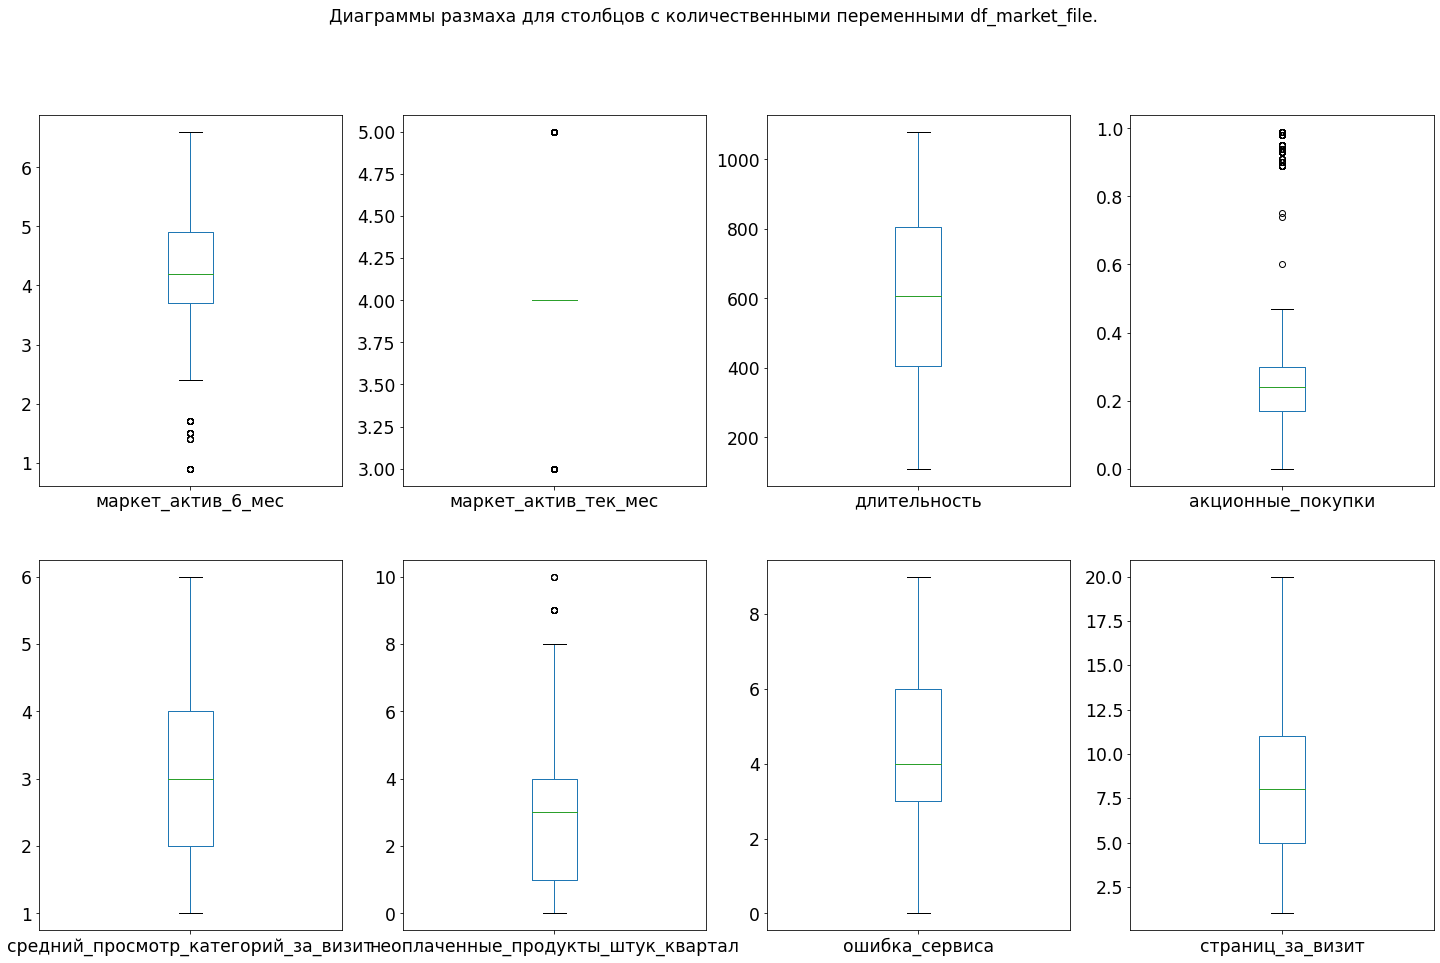

In [291]:
plt.figure(figsize=(25,15))
plt.suptitle('Диаграммы размаха для столбцов с количественными переменными df_market_file.', fontsize = 'xx-large');

for i,t in enumerate(num_col, start=1):
    plt.subplot (2,4,i)
    df_market_file[t].plot(kind='box', fontsize = 'xx-large')



In [292]:
df_market_file.query('акционные_покупки > 0.5').shape

(168, 12)

Видим выбросы в количестве 168 шт. в доле акционных покупок - удалять не будем.

Построим столбчатые графики и гистограммы для `df_market_file`

In [293]:
def hist (df, column):
    plt.figure(figsize=(15,5));
    plt.hist(df[column], bins=25);
    plt.title(f'Гистограмма для признака {column}');
    plt.ylabel('Количество', fontsize='large');
    plt.xlabel(column,  fontsize='large');
    plt.grid();
    

In [294]:
def bar (df, column):
    plt.figure(figsize=(15,5));
    plt.bar(height = df[column].value_counts(), x = df[column].unique());
    plt.title(f'Столбчатый график для признака {column}');
    plt.ylabel('Количество', fontsize='large');
    plt.xlabel('Значение',  fontsize='large');
    plt.grid();
    

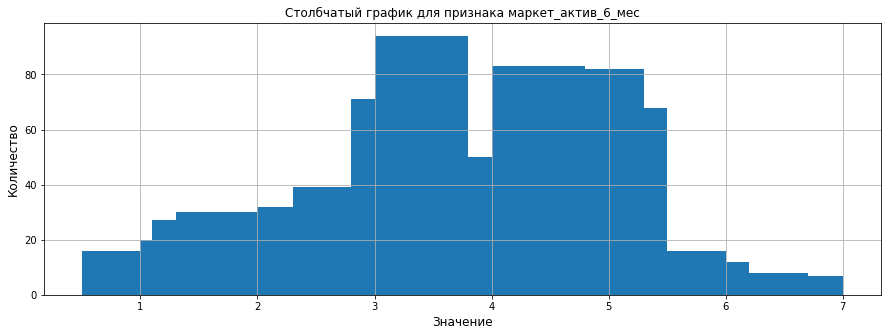

In [295]:
bar (df_market_file, 'маркет_актив_6_мес')

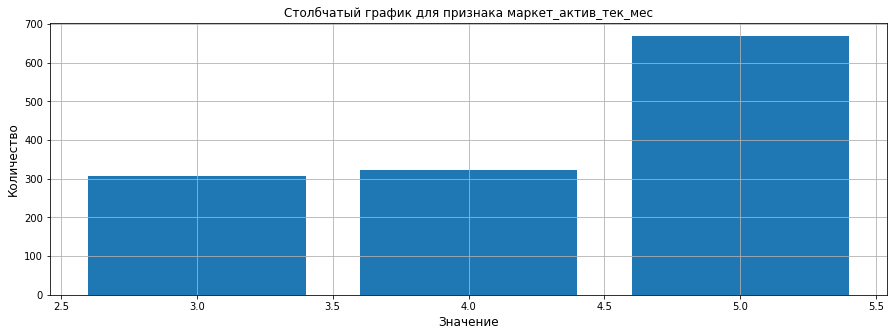

In [296]:
bar (df_market_file, 'маркет_актив_тек_мес')

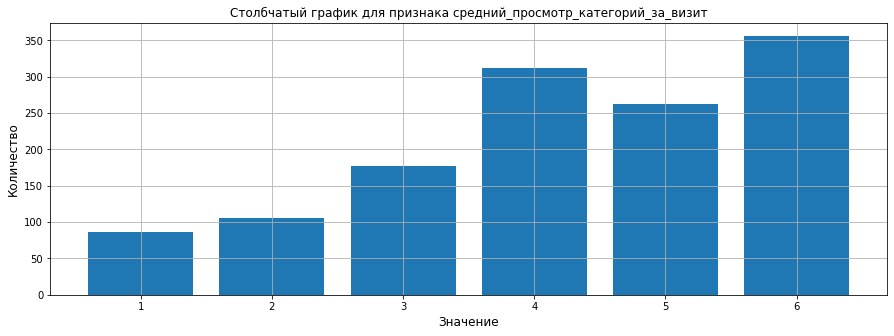

In [297]:
bar (df_market_file, 'средний_просмотр_категорий_за_визит')

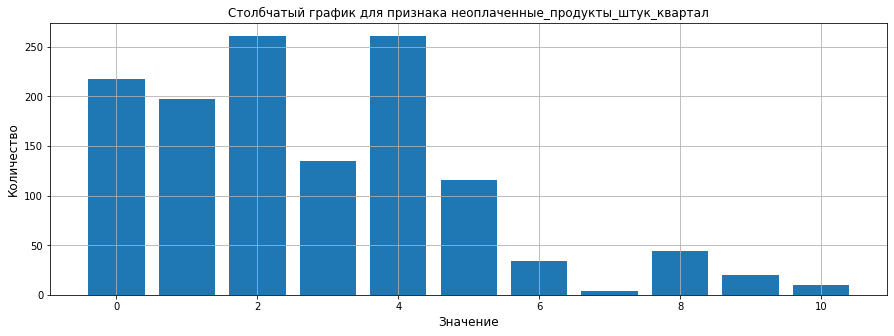

In [298]:
bar (df_market_file, 'неоплаченные_продукты_штук_квартал')

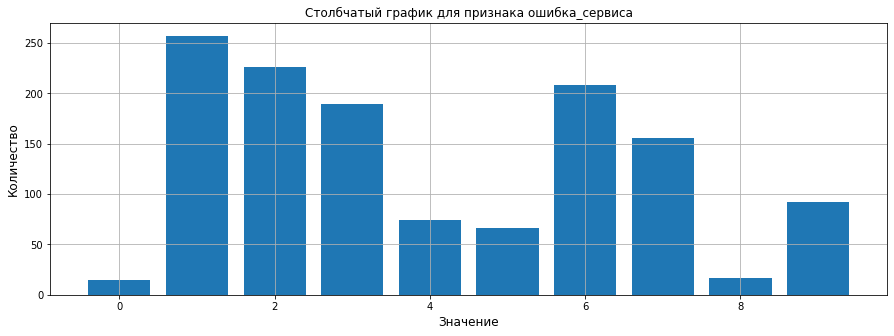

In [299]:
bar (df_market_file, 'ошибка_сервиса')

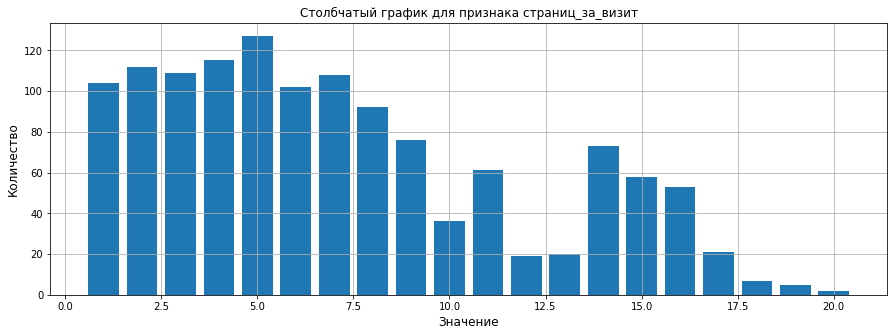

In [300]:
bar (df_market_file, 'страниц_за_визит')

Теперь создадим гистограммы.

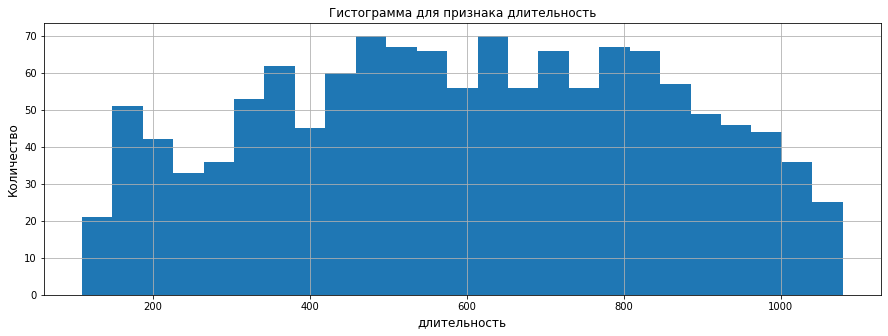

In [301]:
hist (df_market_file, 'длительность')

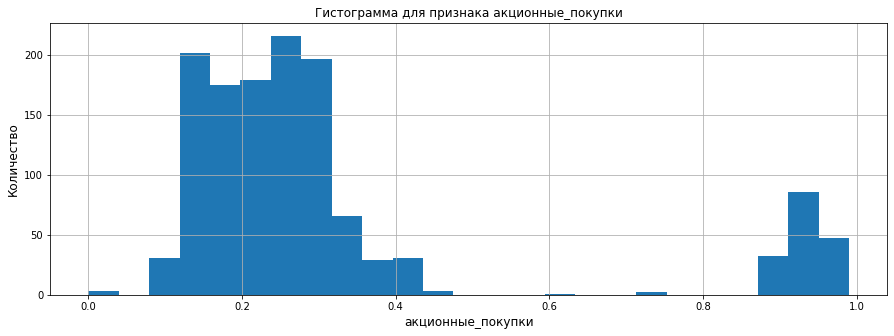

In [302]:
hist (df_market_file, 'акционные_покупки')

In [303]:
df_market_file[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.9,6.60
маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.0,5.00
длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.0,1079.00
акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.3,0.99
средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.0,6.00
неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.0,10.00
ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.0,9.00
страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.0,20.00


**Промежуточный вывод:**
1. Меркетинговая активность за 6 мес распределена нормально.
2. Длительность распределена нормально.
3. Среднее значение маркетинговой активности в целом находится в районе 4 в месяц.
4. В данных не имеется выбросов и аномалий. На диаграмме доли акционных покупок есть выбивающиеся значения, но они созданы определенной категорией покупателей.



Посмотрим на другие датафреймы

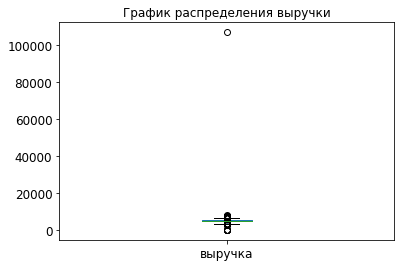

In [304]:
df_market_money['выручка'].plot(kind='box', fontsize = 'large')
plt.title('График распределения выручки');

In [305]:
df_market_money.query('выручка>8000')

,id,период,выручка
98,215380,текущий_месяц,106862.2


In [306]:
df_market_money.query('выручка<1000')

,id,период,выручка
0,215348,предпредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,предпредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,предпредыдущий_месяц,0.0


In [307]:
df_market_money.query('id==215380')

,id,период,выручка
96,215380,предпредыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0
98,215380,текущий_месяц,106862.2


Видим выброс - посмотрим этот `id` в других датафреймах

In [308]:
df_market_file.loc[215380,:]

покупательская_активность                                   снизилась
тип_сервиса                                                   премиум
разрешить_сообщать                                                нет
маркет_актив_6_мес                                                1.7
маркет_актив_тек_мес                                                4
длительность                                                      637
акционные_покупки                                                0.94
популярная_категория                   техника_для_красоты_и_здоровья
средний_просмотр_категорий_за_визит                                 3
неоплаченные_продукты_штук_квартал                                  2
ошибка_сервиса                                                      4
страниц_за_визит                                                    7
Name: 215380, dtype: object

In [309]:
df_market_time[df_market_time['id']== 215380]

,id,период,минут
64,215380,предыдущий_месяц,12
65,215380,текущий_месяц,14


In [310]:
df_money[df_money['id']==215380]

,id,прибыль
32,215380,3.88


Удалим значение выброса.

Построим гистограмму выручки в диапазон от нуля до 8000

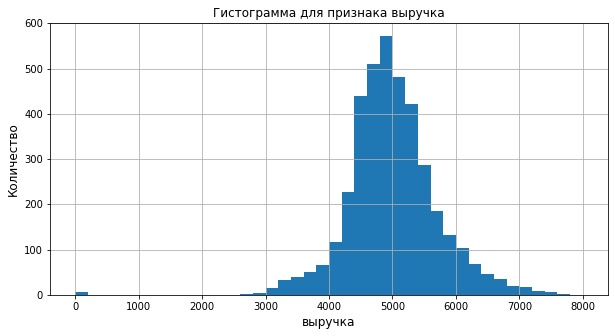

In [311]:
plt.figure(figsize=(10,5))
plt.hist(x=df_market_money['выручка'], bins=40, range=(0,8000))
plt.title(f'Гистограмма для признака выручка');
plt.ylabel('Количество', fontsize='large');
plt.xlabel('выручка',  fontsize='large');
plt.grid();

Видим нормальное распределение. Удалим выброс из всех датафреймов.

In [312]:
df_market_file = df_market_file.drop(index=[215380])
df_market_money = df_market_money[df_market_money['id'] != 215380]
df_market_time = df_market_time[df_market_time['id'] != 215380]
df_money = df_money[df_money['id'] != 215380]


In [313]:
print(df_market_file.shape)
print(df_market_money.shape)
print(df_market_time.shape)
print(df_money.shape)

(1299, 12)
(3897, 3)
(2598, 3)
(1299, 2)


Обратимся к `df_market_time`

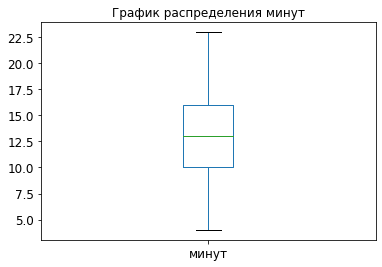

In [314]:
df_market_time['минут'].plot(kind='box', fontsize = 'large')
plt.title('График распределения минут');

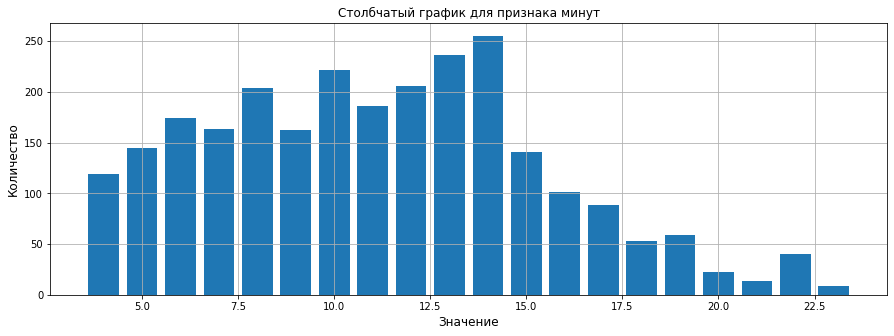

In [315]:
bar (df_market_time, 'минут')

Здесь никаких отклонений.

Далее к `df_money`

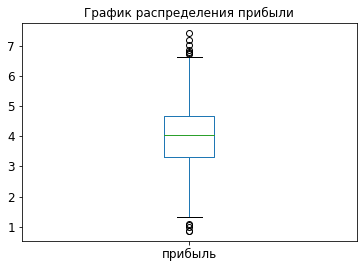

In [316]:
df_money['прибыль'].plot(kind='box', fontsize = 'large')
plt.title('График распределения прибыли');

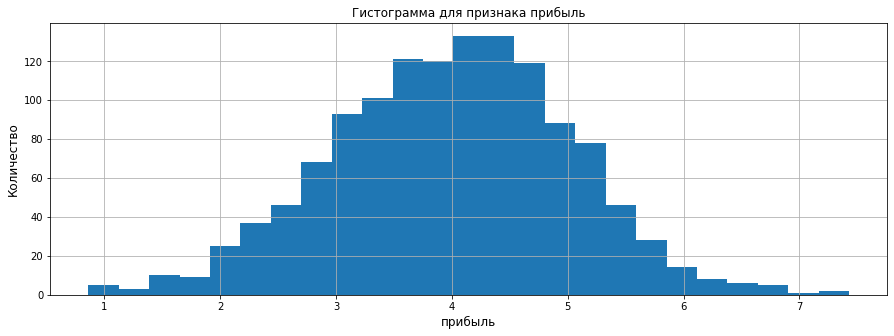

In [317]:
hist (df_money, 'прибыль')

Здесь нормально распределение. Исправлять ничего не нужно.

### Категориальные признаки.

In [318]:
cat_col

['покупательская_активность',
 'тип_сервиса',
 'разрешить_сообщать',
 'популярная_категория']

In [319]:
def pie(df, column):
    plt.figure(figsize=(10,5))
    plt.pie(df[column].value_counts(), labels = df[column].value_counts().index, autopct='%1.1f%%');

    plt.title(f'Диаграмма признака {column}');

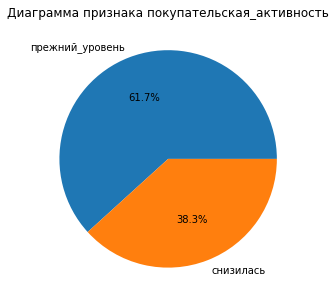

In [320]:
pie (df_market_file, 'покупательская_активность')

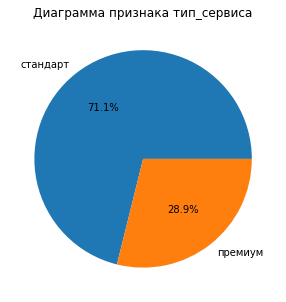

In [321]:
pie (df_market_file, 'тип_сервиса')

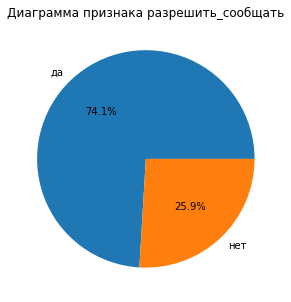

In [322]:
pie (df_market_file, 'разрешить_сообщать')

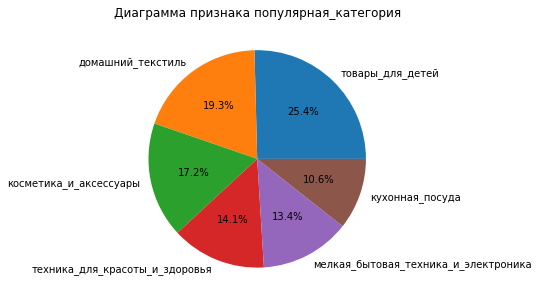

In [323]:
pie (df_market_file, 'популярная_категория')

**Вывод по исследовательскому анализу:**
1. Количественные признаки распределены нормально или равномерно.
2. В процессе исследования обнаружена аномалия у `id` 215380. Выручка за текущий месяц составила 106862.2. Для дальнейшего моделирования удалили это аномальное значение.
3. Среднее значение маркетинговой активности в целом находится в районе 4 в месяц.
4. На диаграмме доли акционных покупок есть выбивающиеся значения, но они созданы определенной категорией покупателей.
5. В категориальных признаках отклонений не обнаружено.




## Объединение таблиц.

Для объединения таблиц приведем их к общей размерности строк. Для этого транспонируем `df_market_time`, `df_market_money`, то есть переместим категории периодов из значений в названия столбцов. Тогда мы получим единую размерность.

Создадим сводную таблицу.

In [324]:
df = df_market_money.pivot_table(index=['id','период'], values = 'выручка', aggfunc = 'sum').reset_index()
df.head(3)

,id,период,выручка
0,215348,предпредыдущий_месяц,0.0
1,215348,предыдущий_месяц,0.0
2,215348,текущий_месяц,3293.1


Переведем в список `id` по порядку как они идут в `df_market_file`

In [325]:
list_id = df_market_file.index

Перебирая `id` будем транспонировать "мини" таблицы с каждым `id` и добавлять в список

In [326]:
list=[]
for i in list_id:
    perem=df[df['id']==i].drop('id', axis=1).set_index('период').T.loc['выручка'].to_list()
    list.append(perem)

Создадим датафрейм

In [327]:
df_market_money_transpose=pd.DataFrame(list, columns = ['выручка_предпредыдущий_месяц','выручка_предыдущий_месяц','выручка_текущий_месяц'])

Проверим размерность

In [328]:
df_market_money_transpose.shape

(1299, 3)

Добавим `id`

In [329]:
df_market_money_transpose['id'] = pd.Series(list_id)

In [330]:
df_market_money_transpose.head()

,выручка_предпредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,id
0,0.0,0.0,3293.1,215348
1,4472.0,5216.0,4971.6,215349
2,4826.0,5457.5,5058.4,215350
3,4793.0,6158.0,6610.4,215351
4,4594.0,5807.5,5872.5,215352


Закинем `id` в индекс

In [331]:
df_market_money_transpose = df_market_money_transpose.set_index('id')

Теперь те же операции проведем с `df_market_time`

In [332]:
df_1 = df_market_time.pivot_table(index=['id','период'], values = 'минут', aggfunc = 'sum').reset_index()
df_1.head(6)

,id,период,минут
0,215348,предыдущий_месяц,13
1,215348,текущий_месяц,14
2,215349,предыдущий_месяц,12
3,215349,текущий_месяц,10
4,215350,предыдущий_месяц,8
5,215350,текущий_месяц,13


Перебирая `id` будем транспонировать "мини" таблицы с каждым `id` и добавлять в список

In [333]:
list=[]
for i in list_id:
    perem=df_1[df_1['id']==i].drop('id', axis=1).set_index('период').T.loc['минут'].to_list()
    list.append(perem)

Создадим датафрейм

In [334]:
df_market_time_transpose=pd.DataFrame(list, columns = ['минут_предыдущий_месяц','минут_текущий_месяц'])

Проверим размерность

In [335]:
df_market_time_transpose.shape

(1299, 2)

Добавим `id`

In [336]:
df_market_time_transpose['id'] = pd.Series(list_id)

In [337]:
df_market_time_transpose.head()

,минут_предыдущий_месяц,минут_текущий_месяц,id
0,13,14,215348
1,12,10,215349
2,8,13,215350
3,11,13,215351
4,8,11,215352


Закинем `id` в индекс

In [338]:
df_market_time_transpose = df_market_time_transpose.set_index('id')

In [339]:
df_market_time_transpose.head(1)

,минут_предыдущий_месяц,минут_текущий_месяц
id,,
215348,13,14


In [340]:
print(df_market_file.shape)
print(df_market_money_transpose.shape)
print(df_market_time_transpose.shape)
print(df_money.shape)

(1299, 12)
(1299, 3)
(1299, 2)
(1299, 2)


In [341]:
df_money.head(1)

,id,прибыль
0,215348,0.98


In [342]:
df_money = df_money.set_index('id')

In [343]:
df_market = df_market_file.join(df_market_money_transpose).join(df_market_time_transpose).join(df_money)
df_market.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предпредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,прибыль
id,,,,,,,,,,,,,,,,,,
215348,снизилась,премиум,да,3.4,5,121,0.00,товары_для_детей,6,2,1,5,0.0,0.0,3293.1,13,14,0.98
215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,4472.0,5216.0,4971.6,12,10,4.16
215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13,3.13
215351,снизилась,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,4793.0,6158.0,6610.4,11,13,4.87
215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,4594.0,5807.5,5872.5,8,11,4.21


 Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

Посмотрим, есть ли клиенты без активности в последние три месяца.

In [344]:
df_market.query('выручка_предпредыдущий_месяц ==0 | выручка_предыдущий_месяц==0')

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предпредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,прибыль
id,,,,,,,,,,,,,,,,,,
215348,снизилась,премиум,да,3.4,5,121,0.0,товары_для_детей,6,2,1,5,0.0,0.0,3293.1,13,14,0.98
215357,снизилась,стандарт,да,3.9,5,154,0.0,техника_для_красоты_и_здоровья,3,3,9,5,0.0,0.0,5986.3,12,6,4.66
215359,снизилась,стандарт,да,4.6,5,110,0.0,домашний_текстиль,4,2,4,2,0.0,0.0,4735.0,13,11,5.08


Удалим этих клиентов.

In [345]:
df_market.shape

(1299, 18)

In [346]:
df_market = df_market.query('выручка_предпредыдущий_месяц !=0 & выручка_предыдущий_месяц!=0')

In [347]:
df_market.shape

(1296, 18)

**Вывод**
Посредством транспонирования собрали все данные в единый датафрейм на 18 колонок.

## Корреляционный анализ.

Составим тепловую карту корреляции признаков(кроме целевого)

In [348]:
interval_cols = ['маркет_актив_6_мес', 'маркет_актив_тек_мес',
                                                     'длительность','акционные_покупки','средний_просмотр_категорий_за_визит',
                                                     'неоплаченные_продукты_штук_квартал','ошибка_сервиса','страниц_за_визит',
                                                     'выручка_предпредыдущий_месяц','выручка_предыдущий_месяц','выручка_текущий_месяц',
                                                     'минут_предыдущий_месяц','минут_текущий_месяц','прибыль']

In [349]:
phik_matrix = df_market.drop('покупательская_активность', axis=1).phik_matrix(interval_cols = interval_cols)

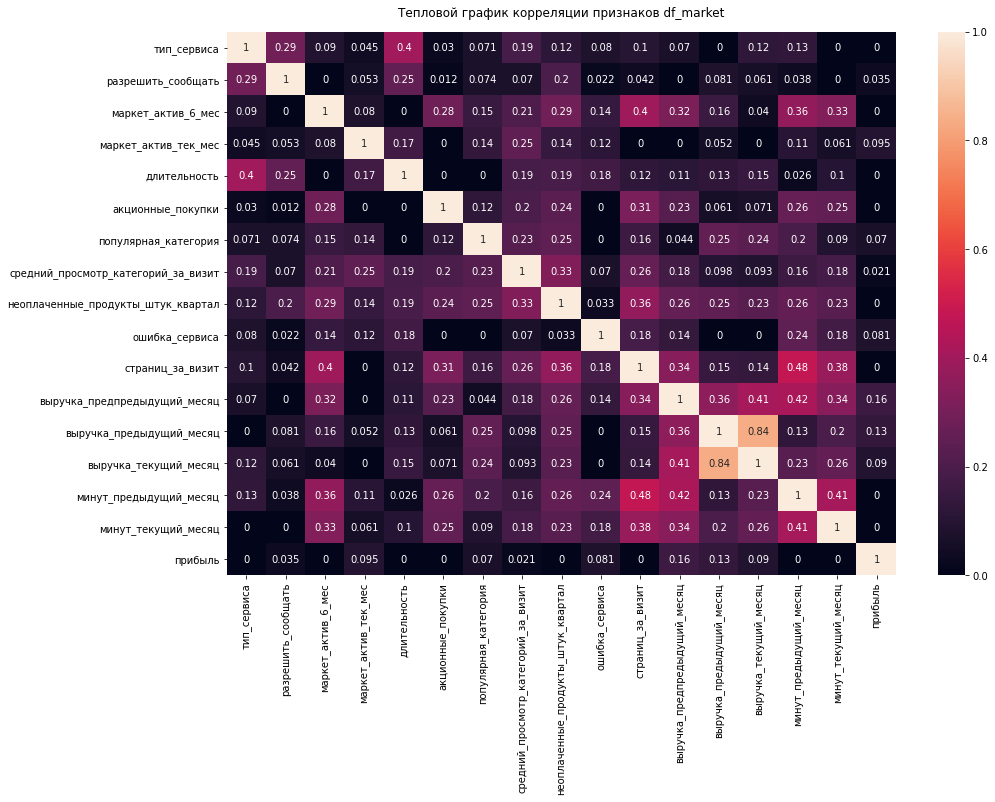

In [350]:
plt.figure(figsize=(15, 10))
sns.heatmap(phik_matrix, annot=True)
plt.title('Тепловой график корреляции признаков df_market', fontsize='large', pad=15)
plt.show()

Видим корреляцию (0.8) между выручкой за предыдущий и текущий месяцы. Взглянем на график.

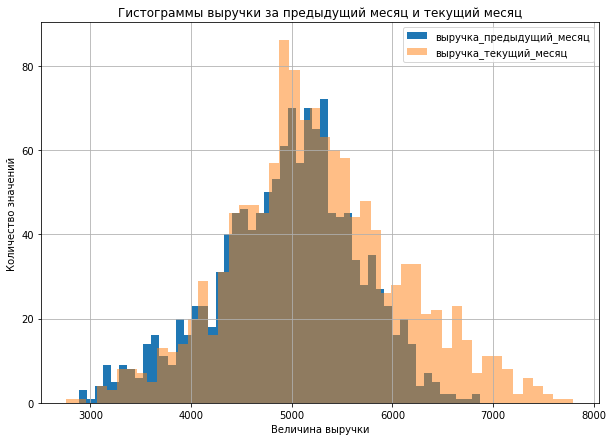

In [351]:
plt.figure(figsize=(10,7))
plt.hist(df_market['выручка_предыдущий_месяц'], bins=50, label ='выручка_предыдущий_месяц')
plt.hist(df_market['выручка_текущий_месяц'], bins=50, label = 'выручка_текущий_месяц', alpha = 0.5)
plt.grid()
plt.title('Гистограммы выручки за предыдущий месяц и текущий месяц')
plt.xlabel('Величина выручки')
plt.ylabel('Количество значений')
plt.legend()

<Figure size 720x504 with 0 Axes>

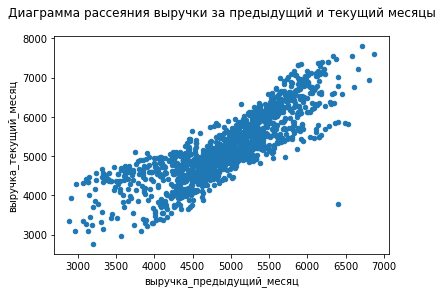

In [352]:
plt.figure(figsize=(10,7));
df_market.plot(x='выручка_предыдущий_месяц', y = 'выручка_текущий_месяц', kind='scatter');
plt.title('Диаграмма рассеяния выручки за предыдущий и текущий месяцы', pad=20);

Корреляция действительно имеется. 

Для устранения мультиколлинеарности уберем признак "выручка_предыдущий месяц"

In [353]:
df_market = df_market.drop('выручка_предыдущий_месяц', axis=1)

**Вывод:** \
После удаления признака "выручка_предыдущий_месяц" мультиколлинеарности в данных не наблюдается.

## Использование пайплайнов.

Создадим выборки.

In [354]:
df_market = df_market.reset_index(drop=True)
df_market

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предпредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,прибыль
0,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,4472.0,4971.6,12,10,4.16
1,снизилась,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,4826.0,5058.4,8,13,3.13
2,снизилась,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,4793.0,6610.4,11,13,4.87
3,снизилась,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,4594.0,5872.5,8,11,4.21
4,снизилась,стандарт,да,3.3,4,762,0.26,домашний_текстиль,4,1,1,4,5124.0,5388.5,10,10,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,прежний_уровень,стандарт,да,6.6,3,318,0.24,техника_для_красоты_и_здоровья,5,3,3,11,4704.0,4741.7,14,7,4.44
1292,прежний_уровень,стандарт,нет,5.1,4,454,0.21,домашний_текстиль,6,2,3,9,5299.0,5353.0,12,11,6.11
1293,прежний_уровень,стандарт,да,4.1,3,586,0.20,домашний_текстиль,3,2,5,7,5334.0,5139.2,12,18,3.29
1294,прежний_уровень,стандарт,да,6.3,5,645,0.12,техника_для_красоты_и_здоровья,3,3,5,7,4725.0,5224.6,18,7,4.03


In [355]:
#df_market['покупательская_активность'] = df_market['покупательская_активность'].apply(lambda x: 1 if x=='снизилась' else 0)

In [356]:
encoder_target = LabelEncoder()
df_market['покупательская_активность'] = encoder_target.fit_transform(df_market['покупательская_активность'])

In [357]:
df_market

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предпредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,прибыль
0,1,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,4472.0,4971.6,12,10,4.16
1,1,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,4826.0,5058.4,8,13,3.13
2,1,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,4793.0,6610.4,11,13,4.87
3,1,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,4594.0,5872.5,8,11,4.21
4,1,стандарт,да,3.3,4,762,0.26,домашний_текстиль,4,1,1,4,5124.0,5388.5,10,10,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,0,стандарт,да,6.6,3,318,0.24,техника_для_красоты_и_здоровья,5,3,3,11,4704.0,4741.7,14,7,4.44
1292,0,стандарт,нет,5.1,4,454,0.21,домашний_текстиль,6,2,3,9,5299.0,5353.0,12,11,6.11
1293,0,стандарт,да,4.1,3,586,0.20,домашний_текстиль,3,2,5,7,5334.0,5139.2,12,18,3.29
1294,0,стандарт,да,6.3,5,645,0.12,техника_для_красоты_и_здоровья,3,3,5,7,4725.0,5224.6,18,7,4.03


In [358]:
X_train, X_test, y_train, y_test = train_test_split(
    df_market.drop('покупательская_активность', axis=1),
    df_market['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df_market['покупательская_активность'])

Text(0, 0.5, 'Количество')

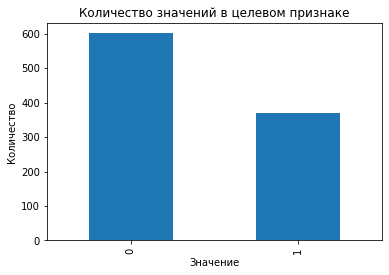

In [359]:
y_train.value_counts().plot(kind='bar')
plt.title('Количество значений в целевом признаке')
plt.xlabel('Значение')
plt.ylabel('Количество')

Выборка является несбалансрованной.

### Первый пайплайн.

Создадим первый пайплайн. Разделим столбцы ohe кодирования, ord кодирования и масштабирования.

In [360]:
ohe_columns = [
    'разрешить_сообщать', 'популярная_категория'
]
ord_columns = [
    'тип_сервиса'
]
num_columns = [
   'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'выручка_предпредыдущий_месяц',
       'выручка_текущий_месяц', 'минут_предыдущий_месяц',
       'минут_текущий_месяц', 'прибыль', 
       
]


Первая часть пайплайна ohe кодирование

In [361]:
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', sparse_output = False, handle_unknown='ignore'))
    ]
)

TypeError: __init__() got an unexpected keyword argument 'sparse_output'

In [1]:
!pip install scikit-learn==1.5.0

     |████████████████████████████████| 13.4 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 82.9 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [2]:
import sklearn
print(sklearn.__version__)

1.5.0


In [362]:
sklearn.__version__

'0.24.1'

Вторая часть - ord кодирование.

In [ ]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'],
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

Третья часть - масштабирование.

In [ ]:
num_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(2))
])

Следующий шаг - объединение всех трех частей в пайплайн `data_preprocessor`

In [ ]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', num_pipe, num_columns)
    ], 
    remainder = 'passthrough'
)

Добавим модель в пайплайн созадим итоговый пайплайн.

In [ ]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LogisticRegression(random_state = RANDOM_STATE))
    ]
)

### Усложним пайплайн.

Теперь добавим в пайплайн возможность поиска лучшей модели, гиперпараметров и методов масштбирования.

Для подбора вышеуказанных параметров будем использовать Random поиск.

Пропишем параметры Random поиска.

In [ ]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='saga', 
            penalty='l1'
        )],
        'models__C': [0.1,0.4,0.7,10,100],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },

    
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__kernel': ['linear', 'rbf', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    }
]

Проведем поиск лучшей модели и гиперпараметра, а также метода масштабирования.

**Метрика** - для оценки качества будем использовать метрику ROC-AUC, так как она отлично подходит для бинарной классификации, с несбалансированной выборкой. 

In [ ]:
random_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=RANDOM_STATE
)
random_search.fit(X_train, y_train)

In [ ]:
print('Лучшая модель и её параметры:\n\n', random_search.best_estimator_)
print()
print(f'Метрика лучшей модели на кросс-валидации: {random_search.best_score_:.3f}')
print()


Лучшей моделью выбрана Логистичекая регрессия, метрика ROC-AUC составила 0.899

Проверим на тестовой выборке.

In [ ]:
y_test_proba = random_search.predict_proba(X_test)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_proba):.3f}')

**Вывод:**
1. Построен пайплайн в котором перебираются комбинации четырех моделей: LogisticRegression, SVC, DecisionTreeClassifier, KNeighborsClassfier и их гиперпараметры, а также методы масштабирования.
2. С использованием рандомного поиска выбрана лучшая модель - Логистическая регрессия. 
3. Метрики ROC_AUC следующие: 
    - Кросс-валидация - 0.899
    - тестовая выборка - 0.919

## Анализ важности признаков.

Оценим важность каждого признака модели. 

Будем использовать метод SHAP.

Представим лучшую модель с закодированными признаками.

In [363]:
model = LogisticRegression(C=0.7, penalty='l1', random_state=42, solver='saga')

In [364]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_columns])
X_test_scaled = scaler.transform(X_test[num_columns])
X_train_scaled_num = pd.DataFrame(X_train_scaled, columns = num_columns)
X_test_scaled_num = pd.DataFrame(X_test_scaled, columns = num_columns)

In [365]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[ohe_columns + ord_columns])
X_test_ohe = encoder.transform(X_test[ohe_columns + ord_columns])
X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder.get_feature_names_out())
X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder.get_feature_names_out())

TypeError: __init__() got an unexpected keyword argument 'sparse_output'

In [ ]:
X_train_new = pd.concat([X_train_scaled_num, X_train_ohe], axis = 1)
X_test_new = pd.concat([X_test_scaled_num, X_test_ohe], axis = 1)

Обучим модель. 

In [ ]:
model.fit(X_train_new, y_train)

Построим графики.

### Вклад числовых признаков.

In [ ]:
coefficients = model.coef_[0][:13]
feature_importance = pd.DataFrame({'Feature': num_columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(12, 7))
plt.title('График важности числовых признаков df_market', pad = 15, fontsize='large')
plt.xlabel('Важность')
plt.ylabel('Признак')

### Вклад категориальных признаков.

In [ ]:
coefficients = model.coef_[0][13:20]
feature_importance = pd.DataFrame({'Feature': X_train_new.columns[13:20], 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(12, 7))
plt.title('График важности категориальных признаков df_market', pad = 15, fontsize='large')
plt.xlabel('Важность')
plt.ylabel('Признак')

### SHAP графики.

In [ ]:
explainer = shap.LinearExplainer(model, X_train_new)
shap_values = explainer(X_train_new)
plt.title('График визуализации вклада признаков df_market', pad = 15, fontsize='large')
#plt.figure(figsize = (12,7))
shap.plots.beeswarm(shap_values, max_display=20) 


In [366]:
shap.plots.waterfall(shap_values[5])

NameError: name 'shap_values' is not defined

**Интерпретация результатов SHAP анализа:**


1. Самым значимым признаком являются признаки `средний_просмотр_категорий_за_визит` и `страниц_за_визит` чем они ниже тем модель вероятнее отнесет объект к классу 1 - снижению покупательской активности.
2. Затем следуют признаки `минут_предыдущий_месяц` и `минут_текущий_месяц`. Аналогично, чем они ниже тем модель вероятнее отнесет объект к классу 1 - снижению покупательской активности.
3. На третьем месте параметр `маркет_актив_тек_мес`. При снижении данного параметра, вероятность отнесения к категории "снизилась".
4. При увеличении доли акционных покупок растет вероятность снижения потребительской активности.
5. Клиенты с популярной категорией "Мелкая бытовая техника и электроника" более вероятно будут отнесены к с сохранению покупательской активности.



## Сегментация покупателей.

Выберем категорию покупателей со  сниженной покупательской активностью и высокой прибыльностью - назовем сегмент 1.

In [ ]:
df_market['прибыль'].describe()

"Высокой" прибылью будем считать значение выше 3 квартиля - 4.67.

In [367]:
df_segment_1 = df_market.query('(покупательская_активность == 1) & (прибыль > 4.67)')

Сохраним в датафреймы средние значения количественных переменных `df_market`,`df_segment_1`

In [368]:
df_market_mean_value = df_market.drop('покупательская_активность', axis =1).describe().T['mean']

In [369]:
df_segment_1_mean_value = df_segment_1.drop('покупательская_активность', axis =1).describe().T['mean']

Соединим в одну таблицу.

In [370]:
df_merge= pd.concat([df_segment_1_mean_value,df_market_mean_value], axis=1)

In [371]:
df_merge.columns = ['среднее_в_сегменте', 'среднее']
df_merge

,среднее_в_сегменте,среднее
маркет_актив_6_мес,3.681250,4.256404
маркет_актив_тек_мес,4.080357,4.009259
длительность,617.196429,602.967593
акционные_покупки,0.395625,0.320069
средний_просмотр_категорий_за_визит,2.553571,3.267747
неоплаченные_продукты_штук_квартал,3.651786,2.841821
ошибка_сервиса,4.000000,4.184414
страниц_за_визит,5.535714,8.187500
выручка_предпредыдущий_месяц,4677.821429,4836.202160
выручка_текущий_месяц,5175.892857,5238.096065


Визуализируем. Для наглядности сначала признаки со значением меньше 20.

<Figure size 1800x1080 with 0 Axes>

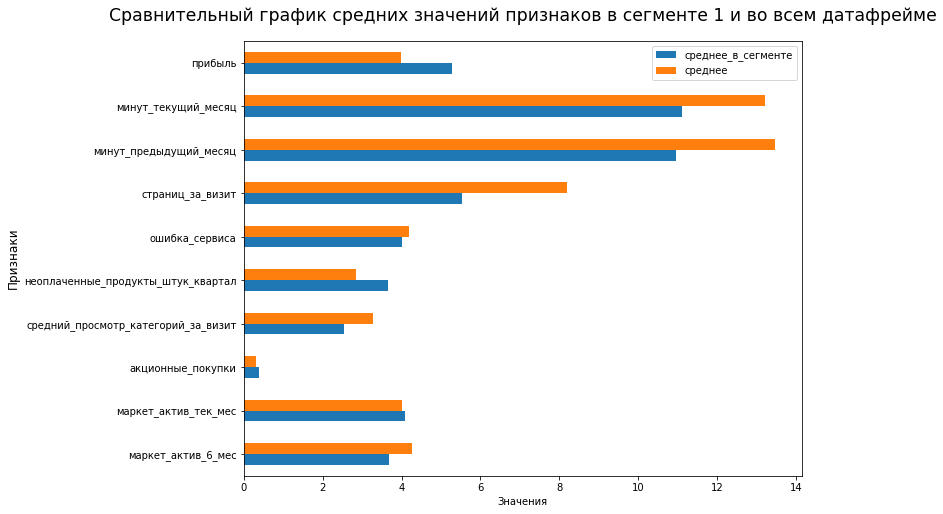

In [372]:
plt.figure(figsize=(25,15));
df_merge.query('среднее_в_сегменте<20').plot(kind='barh', figsize=(10,8));
plt.title('Сравнительный график средних значений признаков в сегменте 1 и во всем датафрейме', fontsize = 'xx-large', pad=20);
plt.ylabel('Признаки', fontsize = 'large');
plt.xlabel('Значения');


Видим следующие различия средних значений числовых признаков сегмента по сравнению с основным датафреймом:
- признаки значения времени проведенного на сайте в сегменте меньше
- значение количества страниц и категорий за визит в сегменте тоже меньше.
- количество неоплаченных продуктов в корзине в сегменте больше.
- маркетинговая активность за 6 месяцев в сегменте меньше.

**Промежуточный вывод:**
- видим, что в сегменте по сравнению со всем датафреймом наблюдается падение признаков времени проведенного на сайте и количества просмотренных страниц и, учитывая тот факт, что эти признаки имеют сравнительно большой вес в коэффициентах модели,  делаем вывод о повышении вероятности отнесения этого сегмента к классу 1 - снижения потребительской активности.



Также посмотрим на категориальный признак "популярная категория" в сегменте и в целом.

In [373]:
df_segment_1_cat = df_segment_1.select_dtypes(exclude='number')

In [374]:
df_segment_1_cat_group = df_segment_1_cat.pivot_table(index='популярная_категория', values = 'тип_сервиса', aggfunc = 'count')
df_segment_1_cat_group.columns=['Количество_в сегменте']

In [375]:
df_market_cat = df_market.select_dtypes(exclude='number')

In [376]:
df_market_cat_group = df_market_cat.pivot_table(index='популярная_категория', values = 'тип_сервиса', aggfunc = 'count')
df_market_cat_group.columns = ['Количество в общем']

In [377]:
df_merge_cat=pd.concat([df_segment_1_cat_group, df_market_cat_group], axis =1)
df_merge_cat

,Количество_в сегменте,Количество в общем
популярная_категория,,
домашний_текстиль,18,250
косметика_и_аксесcуары,30,223
кухонная_посуда,11,138
мелкая_бытовая_техника_и_электроника,7,174
техника_для_красоты_и_здоровья,12,182
товары_для_детей,34,329


Заменим значения на проценты и увидим соотношение количества категории в сегменте и во всем датафрейме.

In [378]:
sum_all = df_merge_cat['Количество в общем'].sum()
sum_segment_1 = df_merge_cat['Количество_в сегменте'].sum()

In [379]:
df_merge_cat['Количество в общем'] = df_merge_cat['Количество в общем'].apply(
    lambda x: (x/sum_all)*100)

In [380]:
df_merge_cat['Количество_в сегменте'] = df_merge_cat['Количество_в сегменте'].apply(
    lambda x: (x/sum_segment_1)*100)

In [381]:
df_merge_cat

,Количество_в сегменте,Количество в общем
популярная_категория,,
домашний_текстиль,16.071429,19.290123
косметика_и_аксесcуары,26.785714,17.206790
кухонная_посуда,9.821429,10.648148
мелкая_бытовая_техника_и_электроника,6.250000,13.425926
техника_для_красоты_и_здоровья,10.714286,14.043210
товары_для_детей,30.357143,25.385802


<Figure size 1800x1080 with 0 Axes>

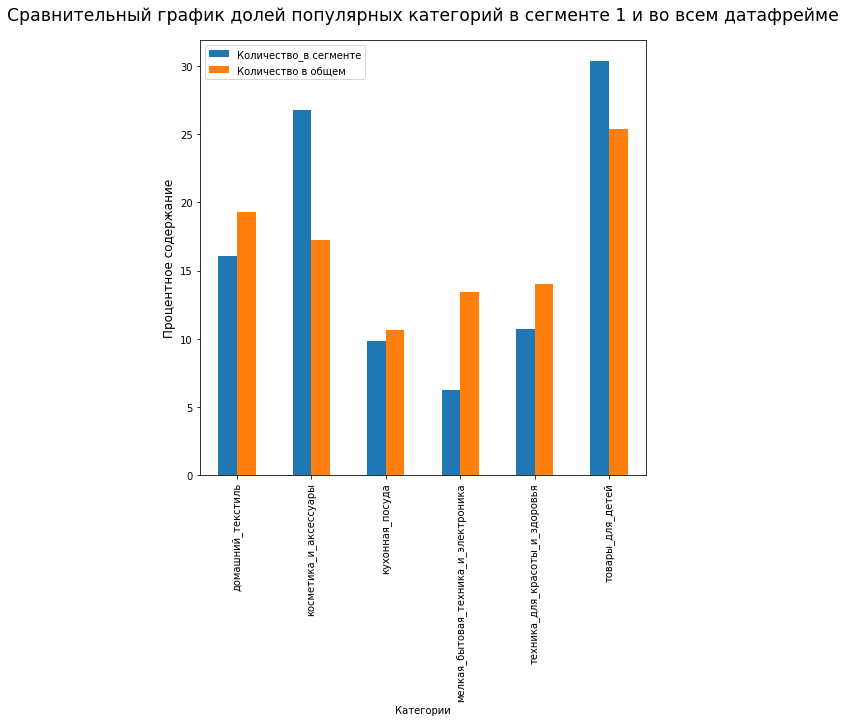

In [382]:
plt.figure(figsize=(25,15));
df_merge_cat.plot(kind='bar', figsize=(8,8));
plt.title('Сравнительный график долей популярных категорий в сегменте 1 и во всем датафрейме', fontsize = 'xx-large', pad=20);
plt.ylabel('Процентное содержание', fontsize = 'large');
plt.xlabel('Категории');


**Рекомендации для увеличения покупательской активности сегмента 1.**
   - предпринять действия, направленные на увеличение времени и количества просмотров категорий покупателей на сайте, а также уменьшения количества неоплаченных продуктов в корзине, например, напоминать покупателю о закинутых в корзину товарах.
   - увеличить долю покупателей мелкой бытовой техники и электроники, так как покупатели этой категории имеют более низкую вероятность отнесения к "классу снижения активности"
   - уменьшить долю покупателей косметики и аксессуаров, так как увеличение доли покупатели этой категории согласно модели оказывает  "давление" на увеличение вероятности снижения покупательской активности.

## Общий вывод.

В данной работе были выполнены следующие мероприятия:
 - **Загрузка и предобработка данных:**
    1. В предоставленных датафреймах не обнаружено пропусков и дубликатов.
    2. Изменен тип данных на числовой в столбце "Выручка" `df_money`.
    3. Названия столбцов и значения в категориальных переменных приведены к нижнему регистру, пробелы заменены на `_`
    4. Исправлены опечатки в значениях категорий.
    
- **Проведен исследовательский анализ:**
    1. Количественные признаки распределены нормально или равномерно.
    2. В процессе исследования обнаружена аномалия у `id` 215380. Выручка за текущий месяц составила 106862.2. Для дальнейшего моделирования удалили это аномальное значение.
    3. Среднее значение маркетинговой активности в целом находится в районе 4 в месяц.
    4. На диаграмме доли акционных покупок есть выбивающиеся значения, но они созданы определенной категорией покупателей.
    5. В категориальных признаках отклонений не обнаружено.


- **Объединение данных:**\
    Посредством транспонирования собрали все данные в единый датафрейм на 18 колонок.


- **Корреляционный анализ признаков:**\
    Для устранения мультиколлинеарности удален признак "выручка_предыдущий_месяц".


- **Использование пайплайнов и выбор модели для предсказаний:**
    1. Построен пайплайн в котором происходит подготовка данных, перебираются комбинации четырех моделей: LogisticRegression, SVC, DecisionTreeClassifier, KNeighborsClassfier и их гиперпараметры, а также методы масштабирования.
    2. С использованием рандомного поиска выбрана лучшая модель для предсказания снижения потребительской активности - Логистическая регрессия. 
    3. Метрики ROC_AUC следующие: 
        - Кросс-валидация - 0.899
        - тестовая выборка - 0.919
        
        
- **Проведен анализ важности признаков модели:**
    1. Самым значимым признаком являются признаки `средний_просмотр_категорий_за_визит` и `страниц_за_визит` чем они ниже тем модель вероятнее отнесет объект к классу 1 - снижению покупательской активности.
    2. Затем следуют признаки `минут_предыдущий_месяц` и `минут_текущий_месяц`. Аналогично, чем они ниже тем модель вероятнее отнесет объект к классу 1 - снижению покупательской активности.
    3. На третьем месте параметр `маркет_актив_тек_мес`. При снижении данного параметра, вероятность отнесения к категории "снизилась".
    4. При увеличении доли акционных покупок растет вероятность снижения потребительской активности.
    5. Клиенты с популярной категорией "Мелкая бытовая техника и электроника" более вероятно будут отнесены к с сохранению покупательской активности.
    

- **Сегментация покупателей:**\
\
    Выделен сегмент покупателей с вероятностью снижения потребительской активности и высокой прибылью. проведен сравнительный анализ данного сегмента со всеми данными, выделены "слабые места", влияющие на активность. Далее, учитывая "веса" признаков модели выданы следующие рекомендации для сохранения потребительской активности:
   - предпринять действия, направленные на увеличение времени и количества просмотров категорий покупателей на сайте, возможно изменить оформление, поправить удобство интерфейса.
   - напоминать покупателю о закинутых в корзину товарах.
   - увеличить долю покупателей мелкой бытовой техники и электроники, так как покупатели этой категории имеют более низкую вероятность отнесения к "классу снижения активности"
   - уменьшить долю покупателей косметики и аксессуаров, так как увеличение доли покупатели этой категории согласно модели оказывает  "давление" на увеличение вероятности снижения покупательской активности.